In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [6]:
!pip install lightgbm
!pip install xgboost
!pip install missingno

import warnings
warnings.filterwarnings("ignore")

import os
from os.path import join

import pandas as pd
import numpy as np

import missingno as msno

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import KFold, cross_val_score
import xgboost as xgb
import lightgbm as lgb

import matplotlib.pyplot as plt
import seaborn as sns


In [7]:
import warnings
warnings.filterwarnings("ignore")

import os
from os.path import join

import pandas as pd
import numpy as np

import missingno as msno

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import KFold, cross_val_score
import xgboost as xgb
import lightgbm as lgb

import matplotlib.pyplot as plt
import seaborn as sns


In [21]:
#데이터 파악
data = pd.read_csv('C:/Users/vsr33/AIFFEL_quest_rs/Exploration/Ex02/train.csv')
sub = pd.read_csv('C:/Users/vsr33/AIFFEL_quest_rs/Exploration/Ex02/test.csv')
print(f'train data dim : {data.shape}')
print(f'sub data dim : {sub.shape}')

train data dim : (15035, 21)
sub data dim : (6555, 20)


In [26]:
#y = data['price'] target 인 price 삭제
# del data['price'] 한번 삭제하면 다시 삭제 불가

print(data.columns)#컬럼명 확인

train_len = len(data)
data = pd.concat((data, sub), axis=0)
print(len(data))

data.head()

Index(['id', 'date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')
21590


,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,20141013T000000,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,20150225T000000,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
2,2,20150218T000000,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
3,3,20140627T000000,3,2.25,1715,6819,2.0,0,0,3,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
4,4,20150115T000000,3,1.50,1060,9711,1.0,0,0,3,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711


In [71]:
#Train and Test data rename and treatment
train = data
test = sub
#train['date'] = train['date'].apply(lambda i: i[:6]).astype(int)
train.head()

#test['date'] = test['date'].apply(lambda i: i[:6]).astype(int)
#del test['id']

print(test.columns)
test.head()

Index(['date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')


,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,201405,0.414967,4.50,0.576802,0.596485,1.0,0,0,3,11,0.574001,0.565222,2001,0,98053,47.6561,-122.005,0.575723,0.596485
1,201503,0.396088,2.50,0.567339,0.578348,2.0,0,0,3,7,0.567339,0.000000,2003,0,98038,47.3684,-122.031,0.569598,0.579478
2,201501,0.414967,3.00,0.571546,0.576135,2.0,0,3,3,9,0.567794,0.560360,1979,0,98126,47.5714,-122.375,0.568546,0.574243
3,201412,0.365497,1.00,0.562683,0.581492,1.0,0,0,4,7,0.562683,0.000000,1921,0,98002,47.3089,-122.210,0.561340,0.576291
4,201405,0.414967,1.75,0.565803,0.576101,1.0,0,0,4,7,0.559002,0.557573,1947,0,98133,47.7025,-122.341,0.564307,0.576101


0         221900.0
1         180000.0
2         510000.0
3         257500.0
4         291850.0
           ...    
15030     610685.0
15031    1007500.0
15032     360000.0
15033     400000.0
15034     325000.0
Name: price, Length: 15035, dtype: float64


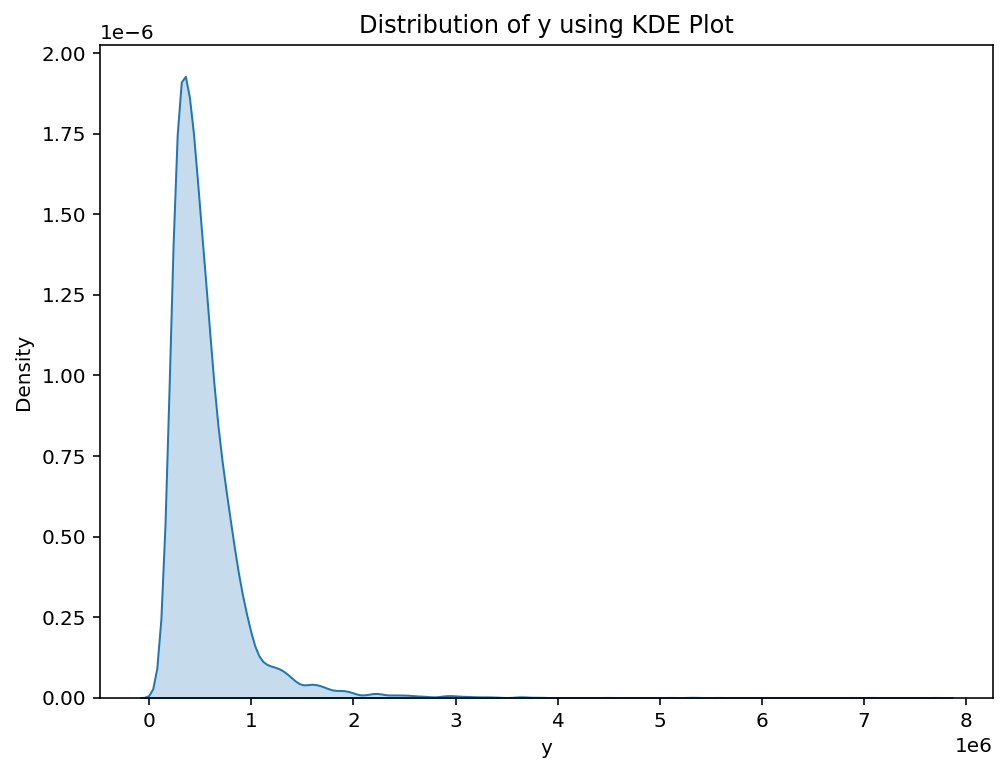

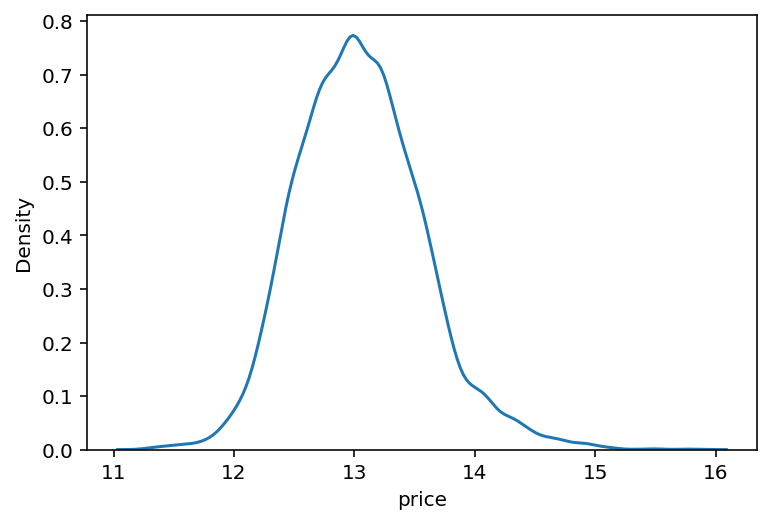

In [74]:
#타겟데이터 y 확인

print(y)

#코드 작성
import seaborn as sns
import matplotlib.pyplot as plt

# KDE Plot
plt.figure(figsize=(8, 6))
sns.kdeplot(y, fill=True)  # fill=True 옵션으로 KDE 곡선 아래를 채울 수 있습니다.
plt.title('Distribution of y using KDE Plot')
plt.xlabel('y')
plt.ylabel('Density')
plt.show()


#로그취하기
y = np.log1p(y)
sns.kdeplot(y)
plt.show()

In [75]:
#전체 데이터 자료형 확인
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21590 entries, 0 to 6554
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           21590 non-null  int32  
 1   bedrooms       21590 non-null  float64
 2   bathrooms      21590 non-null  float64
 3   sqft_living    21590 non-null  float64
 4   sqft_lot       21590 non-null  float64
 5   floors         21590 non-null  float64
 6   waterfront     21590 non-null  int64  
 7   view           21590 non-null  int64  
 8   condition      21590 non-null  int64  
 9   grade          21590 non-null  int64  
 10  sqft_above     21590 non-null  float64
 11  sqft_basement  21590 non-null  float64
 12  yr_built       21590 non-null  int64  
 13  yr_renovated   21590 non-null  int64  
 14  zipcode        21590 non-null  int64  
 15  lat            21590 non-null  float64
 16  long           21590 non-null  float64
 17  sqft_living15  21590 non-null  float64
 18  sqft_lo

<AxesSubplot:>

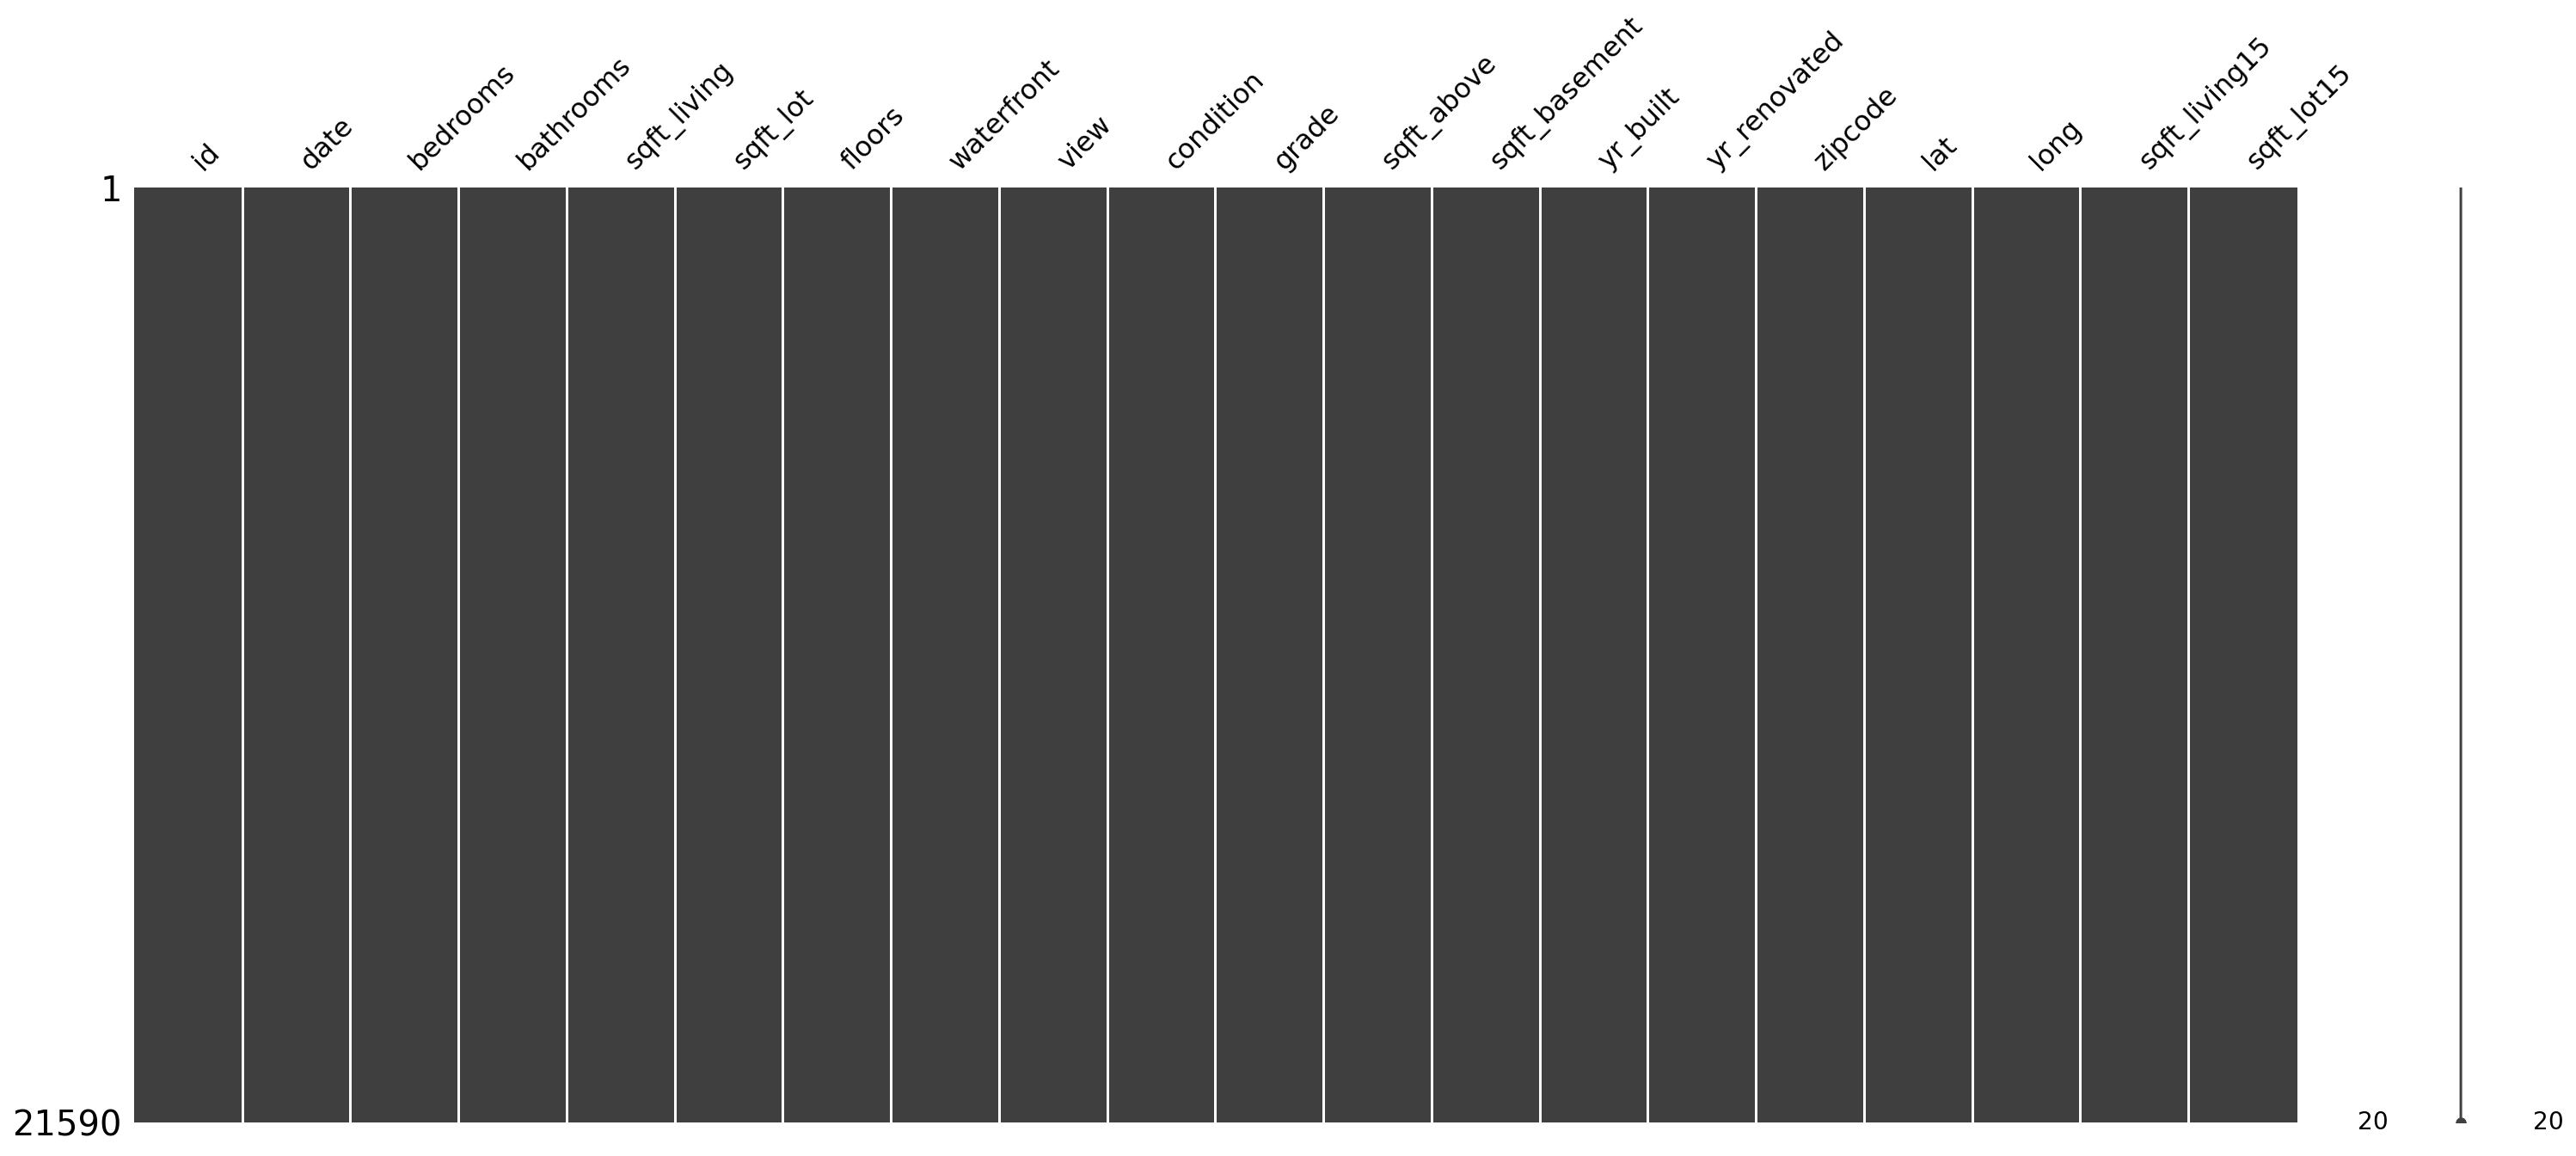

In [27]:
msno.matrix(data) #결측치확인

In [59]:
# 1. id 컬럼이 결측치인지 확인합니다.
null_check = pd.isnull(data['id'])
print(null_check)

# 2. 결측치인 데이터만 뽑아냅니다.
null_data = data.loc[null_check, 'id']
null_data.head()

# 3. 결측치인 데이터의 개수를 셉니다.
print(f'id: {len(null_data.values)}')

# 한 번에 뿅!
# 추가 : 위에 실행했던 코드는 f-string으로 작동하지만 해당 코드는 대괄호가 2개가 있어 f-string으로 표현하면 에러가 발생합니다. 이럴 경우 format으로 실행합니다.
# 추가에 대한 내용 : https://blockdmask.tistory.com/429
print('{} : {}'.format('id', len(data.loc[pd.isnull(data['id']), 'id'].values)))

for c in data.columns:
    print('{} : {}'.format(c, len(data.loc[pd.isnull(data[c]), c].values)))

KeyError: 'id'

Index(['date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')


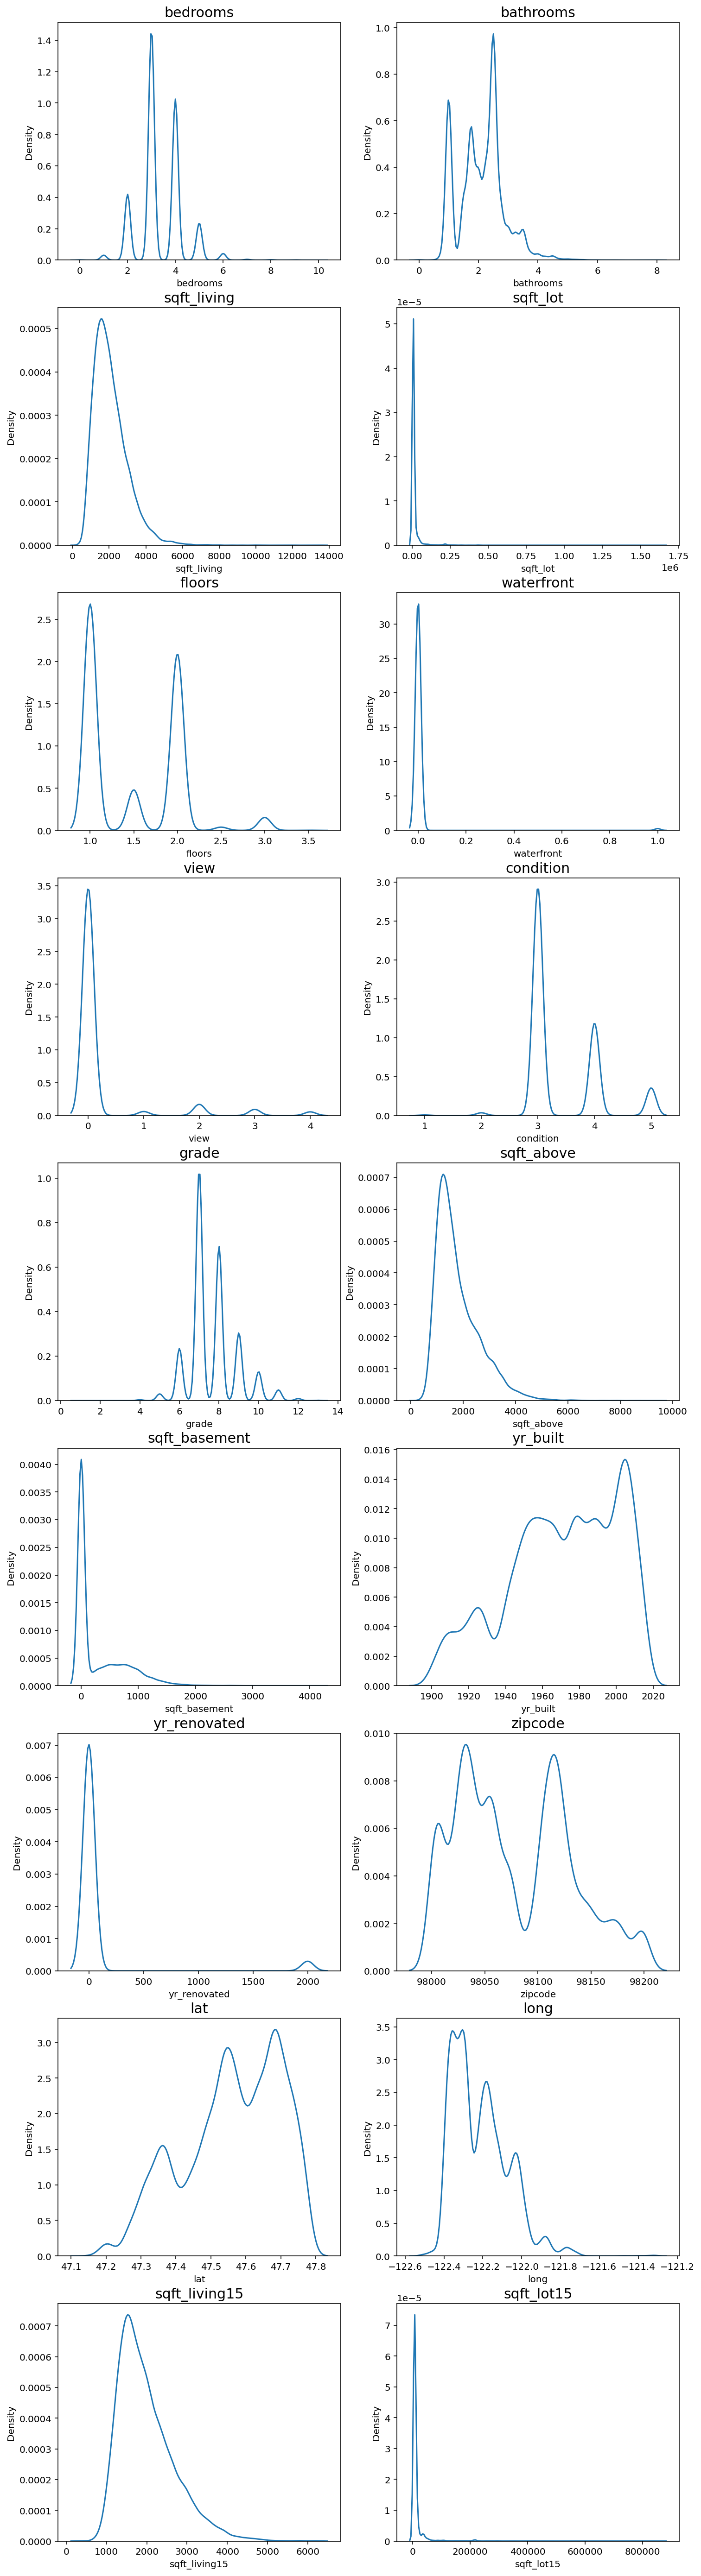

In [33]:
#데이터 저장하고 train data 에서 삭제하기
#sub_id = data['id'][train_len:]
#del data['id']

print(data.columns)

#필요한 부분만 date 자르기
data['date'] = data['date'].apply(lambda x : str(x[:6]))

data.head()

#데이터 분포 확인

fig, ax = plt.subplots(9, 2, figsize=(12, 50))   # 가로스크롤 때문에 그래프 확인이 불편하다면 figsize의 x값을 조절해 보세요. 

# id 변수(count==0인 경우)는 제외하고 분포를 확인합니다.
count = 1
columns = data.columns
for row in range(9):
    for col in range(2):
        sns.kdeplot(data=data[columns[count]], ax=ax[row][col])
        ax[row][col].set_title(columns[count], fontsize=15)
        count += 1
        if count == 19 :
            break

IndexError: list index out of range

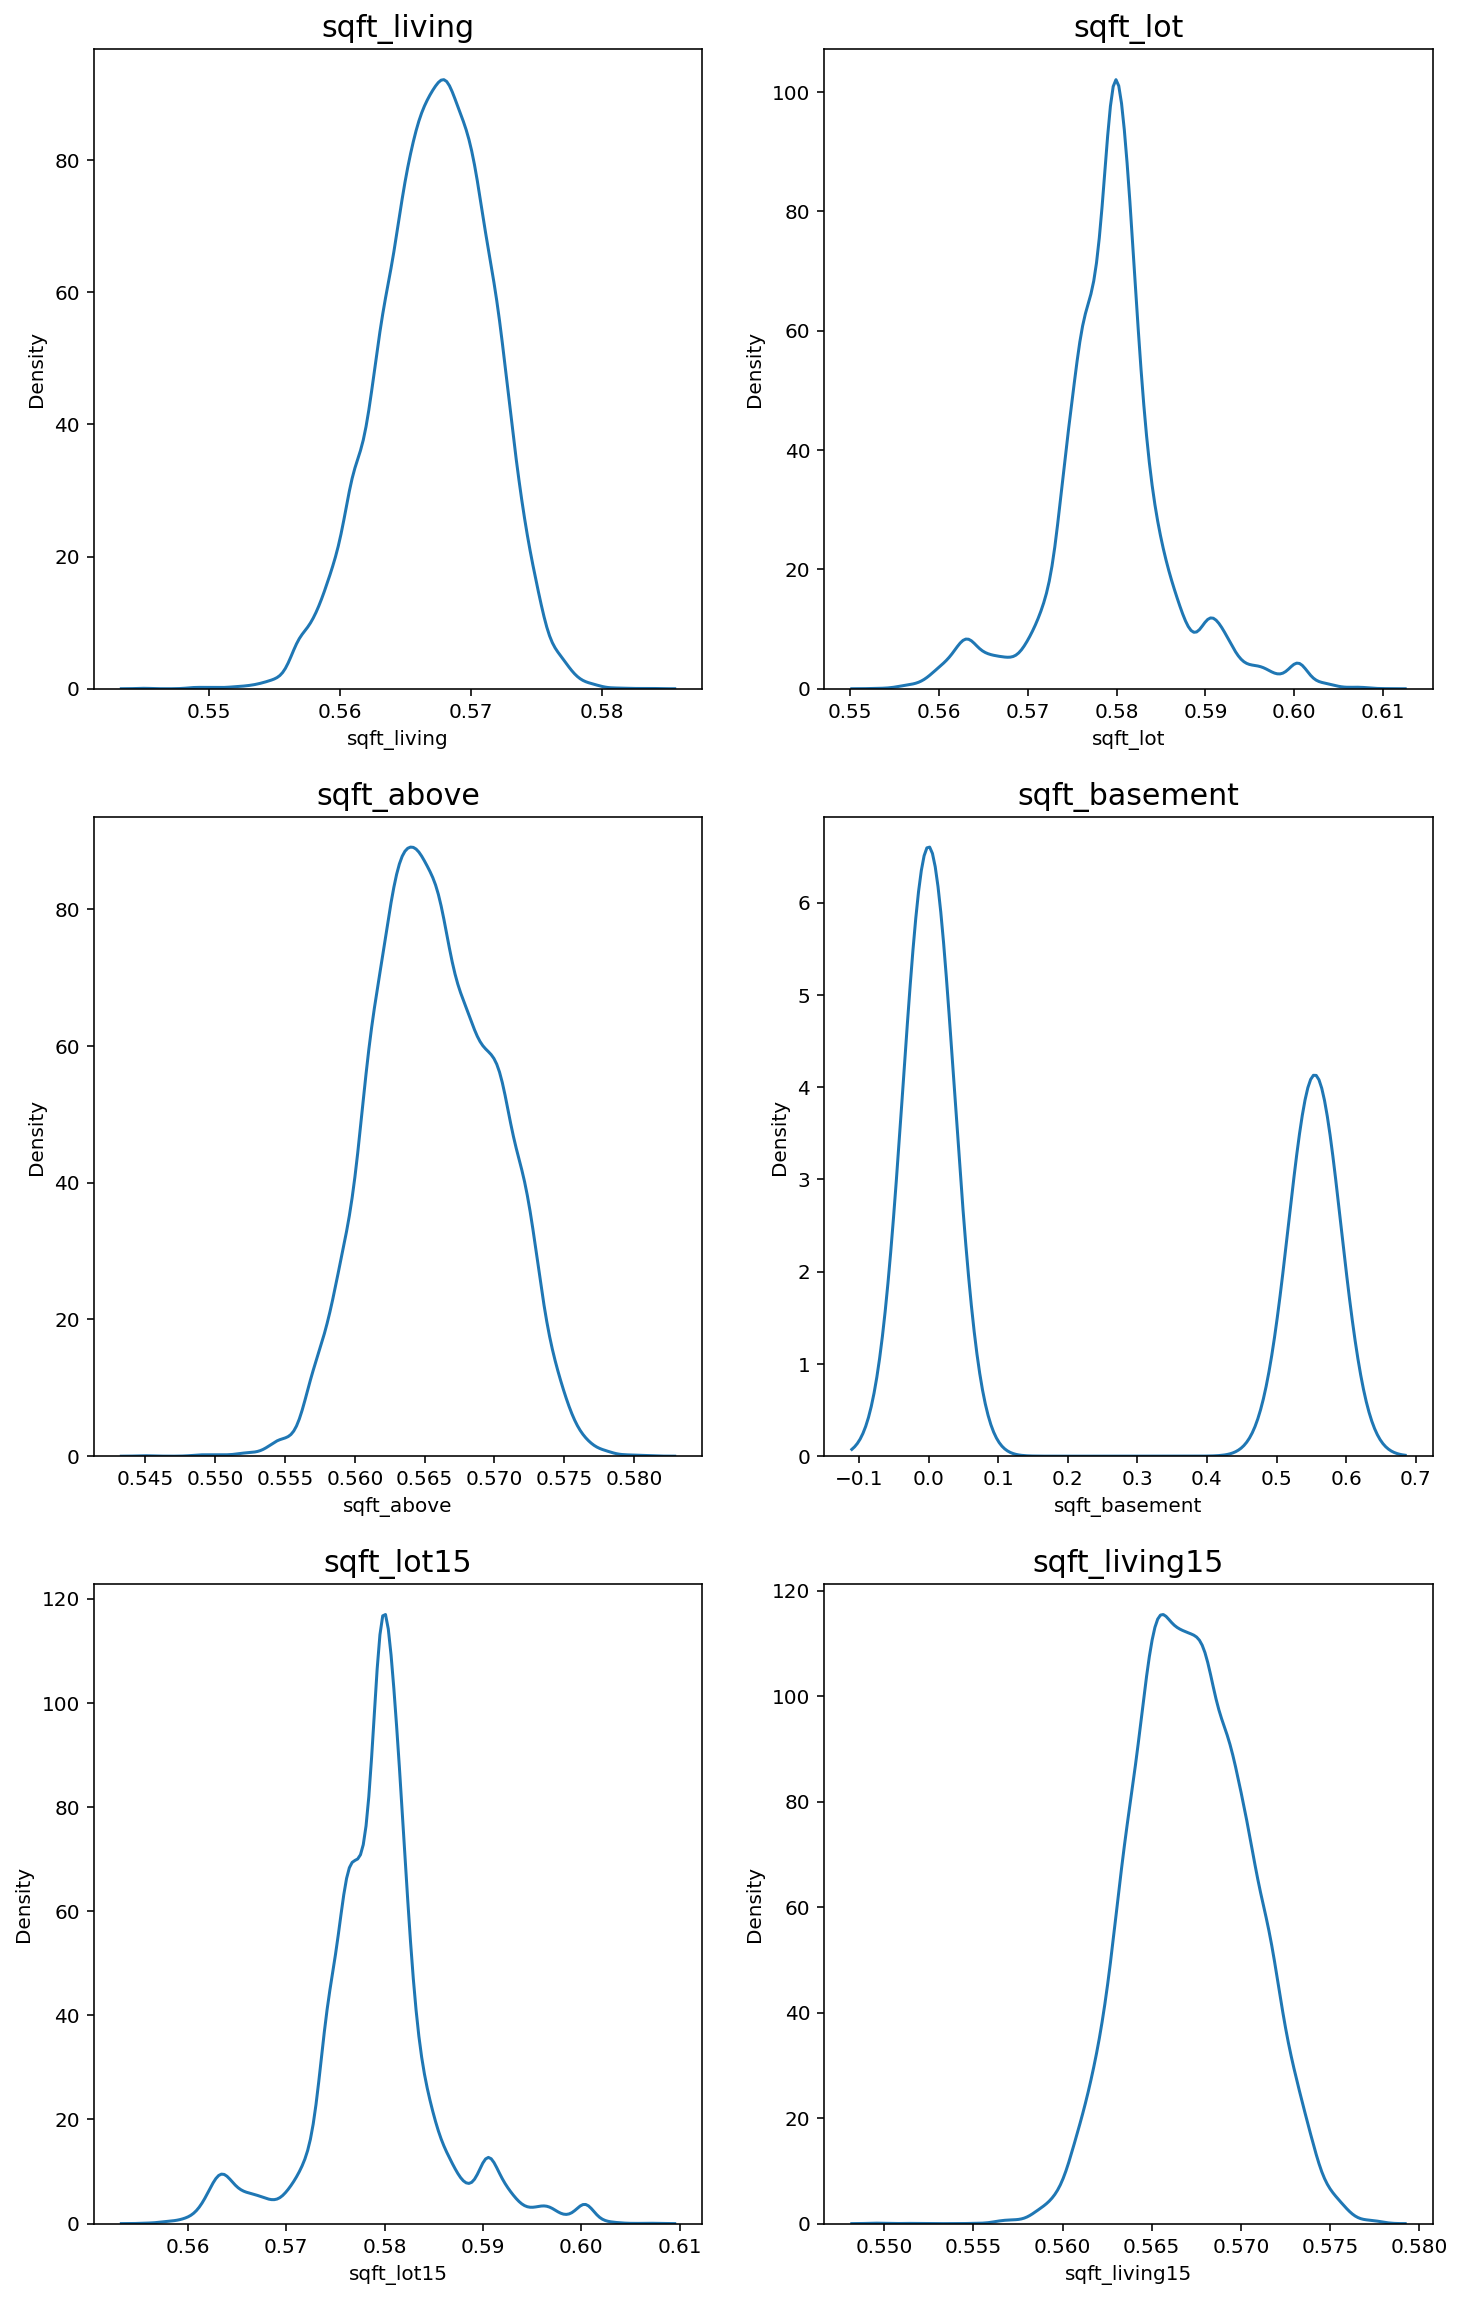

In [38]:
#왼쪽으로 치우친 컬럼 담은 후 로그 변환
skew_columns = ['bedrooms', 'sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement', 'sqft_lot15', 'sqft_living15']

for c in skew_columns:
    data[c] = np.log1p(data[c].values)

fig, ax = plt.subplots(3, 2, figsize=(12, 20))   # 가로스크롤 때문에 그래프 확인이 불편하다면 figsize의 x값을 조절해 보세요. 

# id 변수(count==0인 경우)는 제외하고 분포를 확인합니다.
count = 1
columns = data.columns

for row in range(7):
    for col in range(2):
        sns.kdeplot(data=data[skew_columns[count]], ax=ax[row][col])
        ax[row][col].set_title(skew_columns[count], fontsize=15)
        count += 1
        if count == 8 :
            break

xx = np.linspace(0, 10, 500)
yy = np.log(xx)

plt.hlines(0, 0, 10)
plt.vlines(0, -5, 5)
plt.plot(xx, yy, c='r')
plt.show()

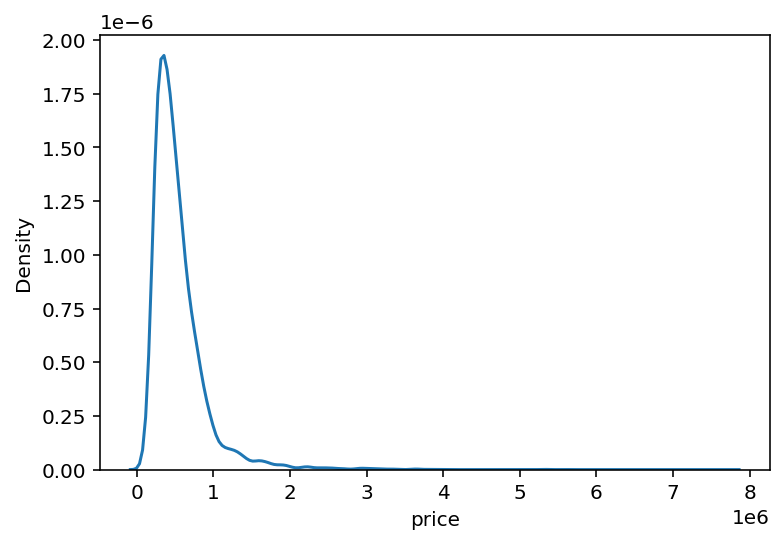

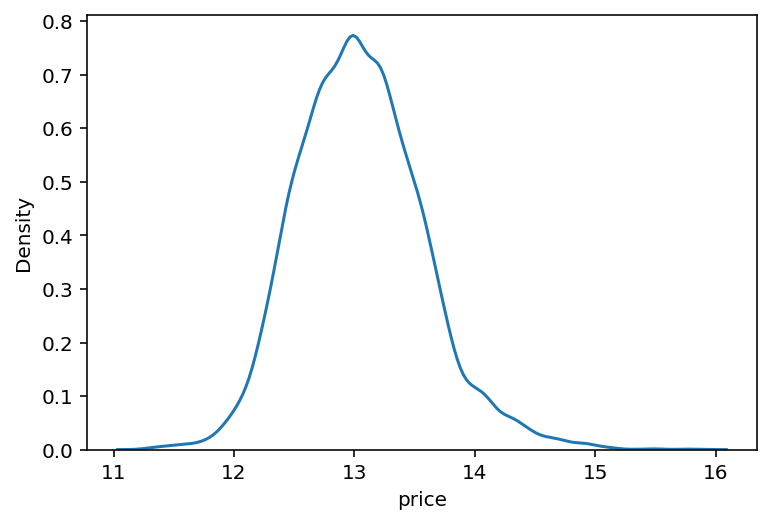

In [42]:
#target 인 price 데이터
sns.kdeplot(y)
plt.show()

#로그 취하면?
y_log_transformation = np.log1p(y)

sns.kdeplot(y_log_transformation)
plt.show()

In [63]:
#train_len 까지는 X (학습 데이터)에 저장, 이후는 실제 추론하는 테스트 데이터 sub 에 저장

sub = data.iloc[train_len:, :]
x = data.iloc[:train_len, :]

print(x.shape)
print(sub.shape)

(15035, 19)
(6555, 19)


In [81]:
#모델 튜닝
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

combined_data = pd.concat([train, y], axis=1)
combined_data.dropna(inplace=True)

# 다시 train과 y로 분리
train = combined_data.iloc[:, :-1]
y = combined_data.iloc[:, -1]

# 일치 여부 확인
print("train 데이터 샘플 수:", len(train))
print("y 데이터 샘플 수:", len(y))


def rmse(y_test, y_pred):
    return np.sqrt(mean_squared_error(np.expm1(y_test), np.expm1(y_pred)))

from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor

# random_state는 모델초기화나 데이터셋 구성에 사용되는 랜덤 시드값입니다. 
#random_state=None    # 이게 초기값입니다. 아무것도 지정하지 않고 None을 넘겨주면 모델 내부에서 임의로 선택합니다.  
random_state=2020        # 하지만 우리는 이렇게 고정값을 세팅해 두겠습니다. 

gboost = GradientBoostingRegressor(random_state=random_state)
xgboost = XGBRegressor(random_state=random_state)
lightgbm = LGBMRegressor(random_state=random_state)
rdforest = RandomForestRegressor(random_state=random_state)

models = [gboost, xgboost, lightgbm, rdforest] #models 리스트 생성

#모델 이름 얻어내기
gboost.__class__.__name__


#모델별 RMSE 값 구하기

def get_scores(models, train, y):
    aaa = {}

    for model in models:
        model_name = model.__class__.__name__

        X_train, X_test, y_train, y_test = train_test_split(train, y, random_state=random_state, test_size=0.2)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        aaa[model_name] = rmse(y_test, y_pred)
    
    score_df = pd.DataFrame(aaa, index=['RMSE']).T.sort_values('RMSE', ascending=False)
    return score_df



score_df = get_scores(models, train, y)
print(score_df)

train 데이터 샘플 수: 21590
y 데이터 샘플 수: 21590
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001240 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2337
[LightGBM] [Info] Number of data points in the train set: 17272, number of used features: 19
[LightGBM] [Info] Start training from score 13.042542
                                    RMSE
RandomForestRegressor      332065.327101
XGBRegressor               321148.720179
LGBMRegressor              310371.480481
GradientBoostingRegressor  306052.588998


In [88]:
#그리드 탐색, 하이퍼파라미터튜닝
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [1, 10],
}


model = LGBMRegressor(random_state=random_state)

grid_model = GridSearchCV(model, param_grid=param_grid, \
                        scoring='neg_mean_squared_error', \
                        cv=5, verbose=1, n_jobs=5)

grid_model.fit(train, y)

grid_model.cv_results_

params = grid_model.cv_results_['params']
params

score = grid_model.cv_results_['mean_test_score']
score

results = pd.DataFrame(params)
results['score'] = score

results

results['RMSE'] = np.sqrt(-1 * results['score'])
results

results = results.rename(columns={'RMSE': 'RMSLE'})
results


results = results.sort_values('RMSLE')
results

def my_GridSearch(model, train, y, param_grid, verbose=2, n_jobs=5):
    # GridSearchCV 모델로 초기화
    grid_model = GridSearchCV(model, param_grid=param_grid, scoring='neg_mean_squared_error', \
                              cv=5, verbose=verbose, n_jobs=n_jobs)
    
    # 모델 fitting
    grid_model.fit(train, y)

    # 결과값 저장
    params = grid_model.cv_results_['params']
    score = grid_model.cv_results_['mean_test_score']
    
    # 데이터 프레임 생성
    results = pd.DataFrame(params)
    results['score'] = score
    
    # RMSLE 값 계산 후 정렬
    results['RMSLE'] = np.sqrt(-1 * results['score'])
    results = results.sort_values('RMSLE')

    return results

param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [1, 10],
}

model = LGBMRegressor(random_state=random_state)
my_GridSearch(model, train, y, param_grid, verbose=2, n_jobs=5)

model = LGBMRegressor(max_depth=10, n_estimators=100, random_state=random_state)
model.fit(train, y)
prediction = model.predict(test)

prediction = np.expm1(prediction)


data_dir = 'C:\\Users\\vsr33\\AIFFEL_quest_rs\\Exploration\\Ex02'

submission_path = join(data_dir, 'sample_submission.csv')
submission = pd.read_csv(submission_path)
submission.head()

#
submission['price'] = prediction
submission.head()

submission_csv_path = '{}/submission_{}_RMSLE_{}.csv'.format(data_dir, 'lgbm', '0.164399')
submission.to_csv(submission_csv_path, index=False)
print(submission_csv_path)


def save_submission(model, train, y, test, model_name, rmsle=None):
    model.fit(train, y)
    prediction = model.predict(test)
    prediction = np.expm1(prediction)
    data_dir = os.getenv('HOME')+'/aiffel/kaggle_kakr_housing/data'
    submission_path = join(data_dir, 'sample_submission.csv')
    submission = pd.read_csv(submission_path)
    submission['price'] = prediction
    submission_csv_path = '{}/submission_{}_RMSLE_{}.csv'.format(data_dir, model_name, rmsle)
    submission.to_csv(submission_csv_path, index=False)
    print('{} saved!'.format(submission_csv_path))



save_submission(model, train, y, test, 'lgbm', rmsle='0.164399')
    

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001366 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2344
[LightGBM] [Info] Number of data points in the train set: 21590, number of used features: 19
[LightGBM] [Info] Start training from score 13.044498
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -i

ValueError: Length of values (6555) does not match length of index (6468)

In [45]:
#Model Ensembling

#Average Boosting : 여러가지 모델의 결과를 산술평균하여 블렌딩 모델을 만들것입니다 여러분!!!
gboost = GradientBoostingRegressor(random_state=2019)
xgboost = xgb.XGBRegressor(random_state=2019)
lightgbm = lgb.LGBMRegressor(random_state=2019)

models = [{'model':gboost, 'name':'GradientBoosting'}, {'model':xgboost, 'name':'XGBoost'},
          {'model':lightgbm, 'name':'LightGBM'}]


#Cross Validation
def get_cv_score(models):
    kfold = KFold(n_splits=5).get_n_splits(x.values)
    for m in models:
        CV_score = np.mean(cross_val_score(m['model'], X=x.values, y=y, cv=kfold))
        print(f"Model: {m['name']}, CV score:{CV_score:.4f}")
        
        
get_cv_score(models)



Model: GradientBoosting, CV score:0.8592
Model: XGBoost, CV score:0.8763
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001101 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2296
[LightGBM] [Info] Number of data points in the train set: 12028, number of used features: 19
[LightGBM] [Info] Start training from score 540497.991270
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002060 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2327
[LightGBM] [Info] Number of data points in the train set: 12028, number of used features: 19
[LightGBM] [Info] Start training from score 542956.681826
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001607 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightG

In [48]:
#Average blending : Model 딕셔너리 내 모델을 모두 학습하고 prediction 생성

def AveragingBlending(models, x, y, sub_x):
    for m in models : 
        m['model'].fit(x.values, y)
    
    predictions = np.column_stack([
        m['model'].predict(sub_x.values) for m in models
    ])
    return np.mean(predictions, axis=1)

y_pred = AveragingBlending(models, x, y, sub)
print(len(y_pred))
print(y_pred)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002428 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2338
[LightGBM] [Info] Number of data points in the train set: 15035, number of used features: 19
[LightGBM] [Info] Start training from score 540682.653143
6555
[1345797.41242777  318047.86097295  782903.43457971 ... 1687461.95580063
  421058.32440782  339532.10185942]


In [56]:
import os
import pandas as pd
from os.path import join

# Windows에서 홈 디렉토리 설정을 직접 지정하거나 USERPROFILE 환경 변수를 사용
data_dir = 'C:\\Users\\vsr33\\AIFFEL_quest_rs\\Exploration\\Ex02'

# 제출 파일 경로 설정
submission_path = join(data_dir, 'sample_submission.csv')

# CSV 파일 읽기
submission = pd.read_csv(submission_path)
print(submission.head())

result = pd.DataFrame({
    'id' : sub_id, 
    'price' : y_pred
})
  
result.head()

my_submission_path = join(data_dir, 'submission.csv')

result.to_csv(my_submission_path, index=False)

result.head()


      id   price
0  15035  100000
1  15036  100000
2  15037  100000
3  15038  100000
4  15039  100000


,id,price
0,15208,1.345797e+06
1,15209,3.180479e+05
2,15210,7.829034e+05
3,15211,2.073472e+05
4,15212,4.319455e+05
